In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import math
plt.style.use('seaborn-poster')
import numpy as np
from datetime import datetime

In [174]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

In [193]:
test.shape

(52837, 17)

In [194]:
test.shape[0] + train.shape[0]

66047

In [173]:
years_all = pd.concat([train["Year"], test["Year"]])
months_all = pd.concat([train["Month"], test["Month"]])

In [172]:
years = train["Year"].values
months = train["Month"].values

In [4]:
attempts = train["attempts"].values

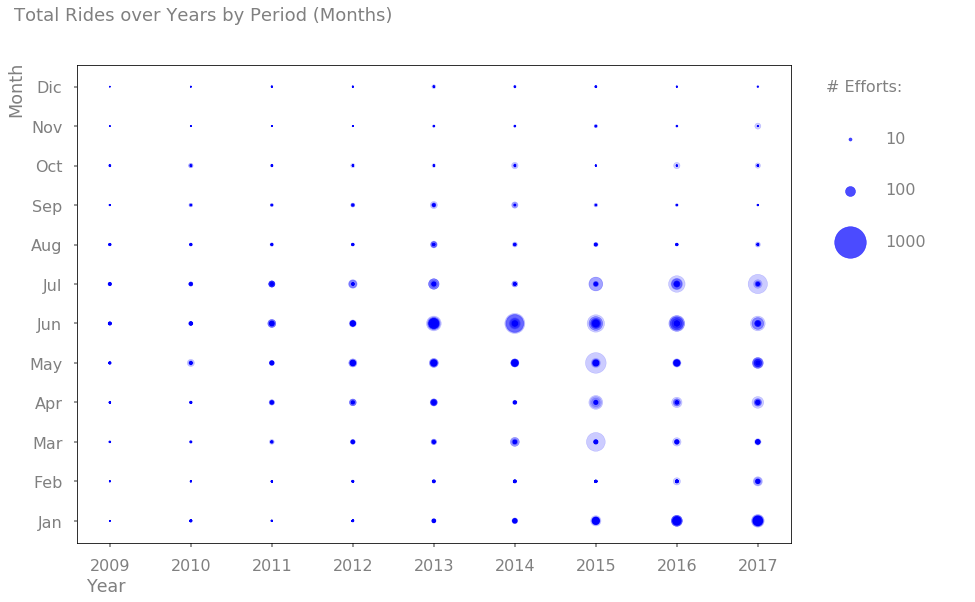

In [146]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(years, months, s=attempts, alpha=0.2, color="blue")

plt.yticks(range(0, 13), ("", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"))
plt.title("Total Rides over Years by Period (Months) ", color="gray", fontsize=18, x=0.18, y=1.08)
ax.set(xlabel="Year", ylabel="Month")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.95))
ax.xaxis.label.set_position((0.04, 0))
ax.xaxis.label.set_color('gray')

ax.scatter([], [], c='b', alpha=0.3, s=0, label="# Efforts:")
for l1 in [10, 100, 1000]:
    ax.scatter([], [], c='blue', alpha=0.7, s=l1, label=str(l1))
leg1 = ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(1.04, 1), fontsize=16, labelspacing=2.3, handletextpad=1.2)
texts = leg1.get_texts()
texts[0].set_color("gray")
texts[0].set_x(-60)
texts[1].set_color("gray")
texts[2].set_color("gray")
texts[3].set_color("gray")

In [6]:
fig.savefig("total-efforts-over-years-by-months.png")

In [7]:
train_lat_lon = train.groupby(["s_lat", "s_lng"]).aggregate({"attempts": "sum"})
train_lat_lon = train_lat_lon.reset_index()

In [8]:
lat = train["s_lat"].values
lng = train["s_lng"].values
attempts = train["attempts"].values

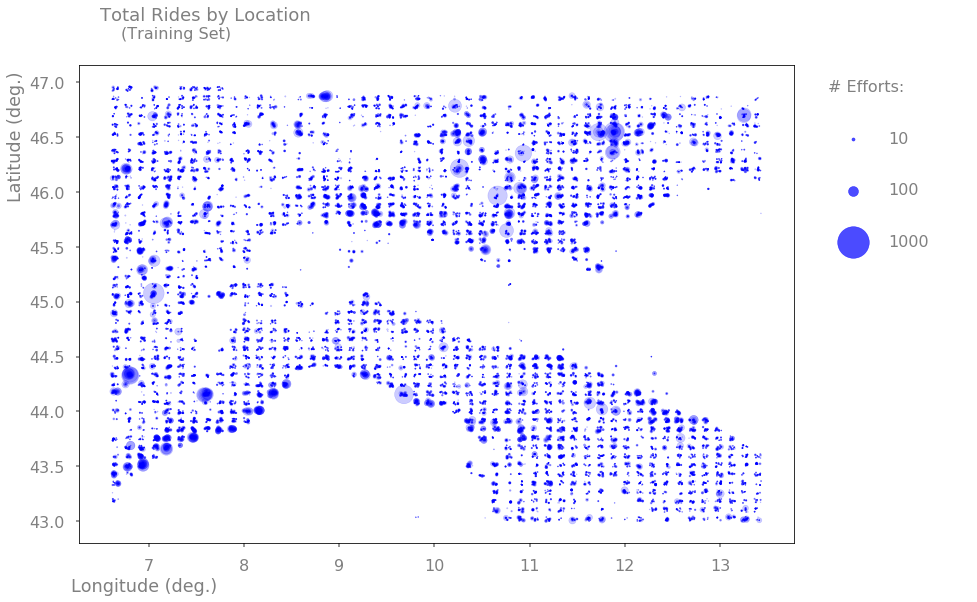

In [121]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(lng, lat, s=attempts, alpha=0.2, color="blue")

#plt.yticks(range(0, 13), ("", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"))
plt.title("Total Rides by Location ", color="gray", fontsize=18, x=0.18, y=1.08)
plt.suptitle("(Training Set)", color="gray", fontsize=16, x=0.23, y=0.94)

ax.set(xlabel="Longitude (deg.)", ylabel="Latitude (deg.)")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')

ax.scatter([], [], c='b', alpha=0.3, s=0, label="# Efforts:")
for l1 in [10, 100, 1000]:
    ax.scatter([], [], c='blue', alpha=0.7, s=l1, label=str(l1))
leg1 = ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(1.04, 1), fontsize=16, labelspacing=2.3, handletextpad=1.2)
texts = leg1.get_texts()
texts[0].set_color("gray")
texts[0].set_x(-60)
texts[1].set_color("gray")
texts[2].set_color("gray")
texts[3].set_color("gray")

In [122]:
fig.savefig("total-efforts-by-location-training.png")

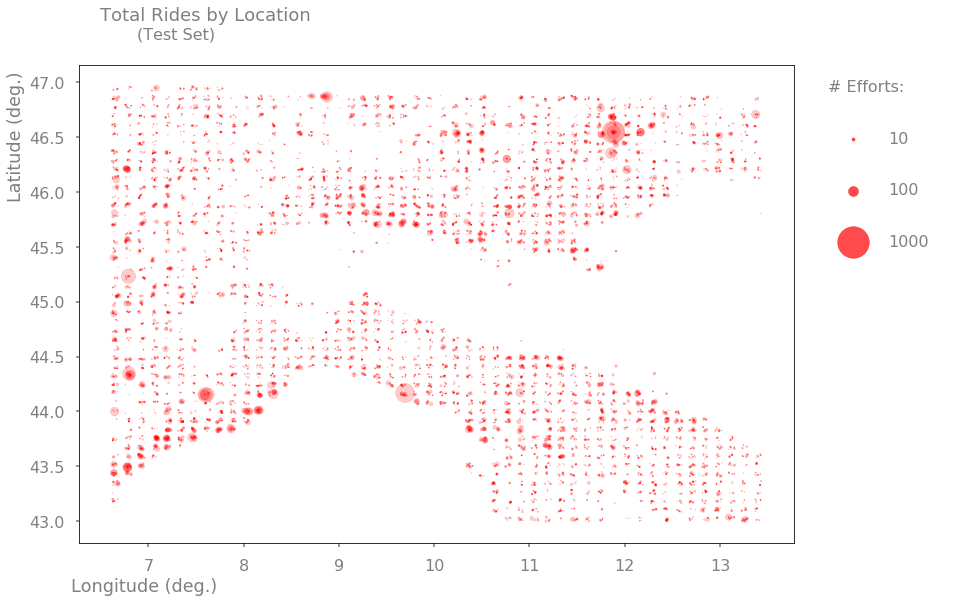

In [123]:
lat_t = test["s_lat"].values
lng_t = test["s_lng"].values
attempts_t = test["attempts"].values

fig = plt.figure()
ax = plt.axes()
ax.scatter(lng_t, lat_t, s=attempts_t, alpha=0.2, color="red")

#plt.yticks(range(0, 13), ("", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"))
plt.title("Total Rides by Location ", color="gray", fontsize=18, x=0.18, y=1.08)
plt.suptitle("(Test Set)", color="gray", fontsize=16, x=0.23, y=0.94)

ax.set(xlabel="Longitude (deg.)", ylabel="Latitude (deg.)")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.09, 0))
ax.xaxis.label.set_color('gray')

ax.scatter([], [], c='b', alpha=0.3, s=0, label="# Efforts:")
for l1 in [10, 100, 1000]:
    ax.scatter([], [], c='red', alpha=0.7, s=l1, label=str(l1))
leg1 = ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(1.04, 1), fontsize=16, labelspacing=2.3, handletextpad=1.2)
texts = leg1.get_texts()
texts[0].set_color("gray")
texts[0].set_x(-60)
texts[1].set_color("gray")
texts[2].set_color("gray")
texts[3].set_color("gray")

In [124]:
fig.savefig("total-efforts-by-location-test.png")

In [13]:
attempts_test = test["attempts"].values

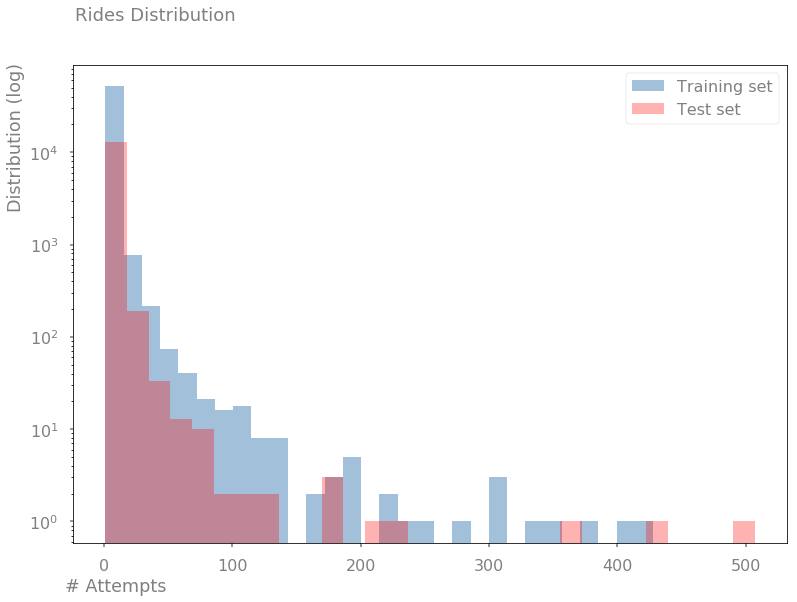

In [79]:
fig = plt.figure()
ax = plt.axes()
plt.yscale('log', nonposy='clip')
ax.hist(attempts, bins=30, alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none", label="Training set")
plt.title("Rides Distribution ", color="gray", fontsize=18, x=0.12, y=1.08)
ax.hist(attempts_test, bins=30, alpha=0.3, histtype="stepfilled", color="red", edgecolor="none", label="Test set")

ax.set(xlabel="# Attempts", ylabel="Distribution (log)")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.06, 0))
ax.xaxis.label.set_color('gray')
lg1 = ax.legend()
texts = lg1.get_texts()
texts[0].set_color("gray")
texts[1].set_color("gray")

In [80]:
fig.savefig("attempts-distribution.png")

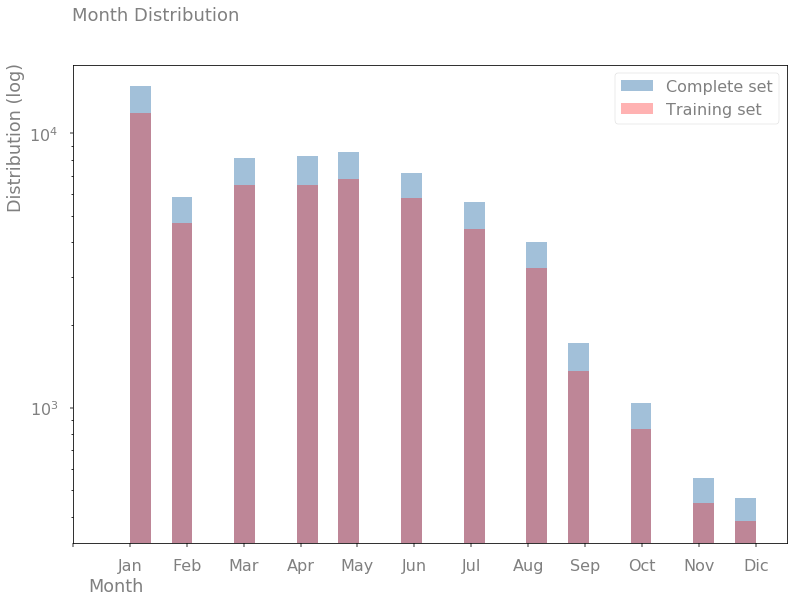

In [168]:
fig = plt.figure()
ax = plt.axes()
plt.yscale('log', nonposy='clip')
ax.hist(months_all, bins=30, alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none", label="Complete set")
plt.title("Month Distribution ", color="gray", fontsize=18, x=0.12, y=1.08)
ax.hist(train["Month"], bins=30, alpha=0.3, histtype="stepfilled", color="red", edgecolor="none", label="Training set")

plt.xticks(range(0, 13), ("", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dic"))

ax.set(xlabel="Month", ylabel="Distribution (log)")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.06, 0))
ax.xaxis.label.set_color('gray')
lg1 = ax.legend()
texts = lg1.get_texts()
texts[0].set_color("gray")
texts[1].set_color("gray")

In [169]:
fig.savefig("month-distribution.png")

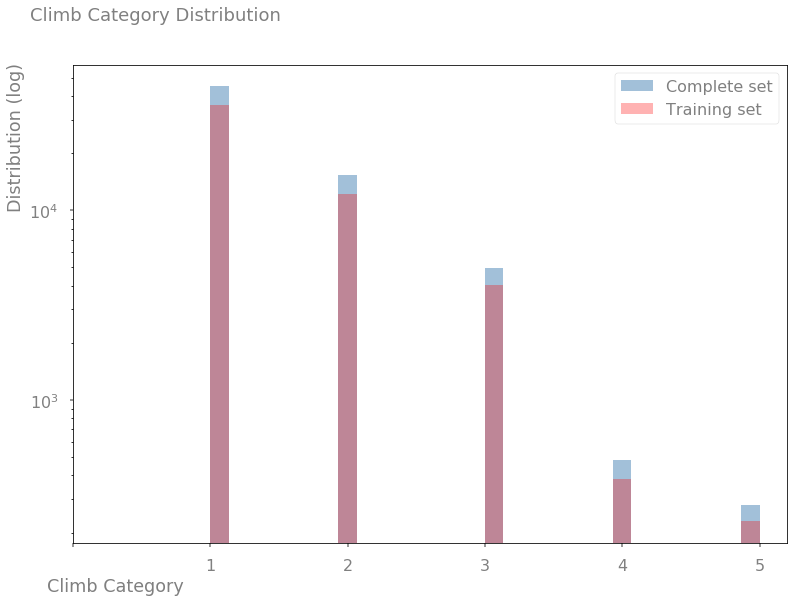

In [189]:
climbs_all = pd.concat([train["climb_category"], test["climb_category"]])
fig = plt.figure()
ax = plt.axes()
plt.yscale('log', nonposy='clip')
ax.hist(climbs_all, bins=30, alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none", label="Complete set")
plt.title("Climb Category Distribution ", color="gray", fontsize=18, x=0.12, y=1.08)
ax.hist(train["climb_category"], bins=30, alpha=0.3, histtype="stepfilled", color="red", edgecolor="none", label="Training set")

plt.xticks(range(0, 6), ("", "1", "2", "3", "4", "5"))

ax.set(xlabel="Climb Category", ylabel="Distribution (log)")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.yaxis.label.set_color('gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.06, 0))
ax.xaxis.label.set_color('gray')
lg1 = ax.legend()
texts = lg1.get_texts()
texts[0].set_color("gray")
texts[1].set_color("gray")

In [190]:
fig.savefig("climb-cat-distribution.png")

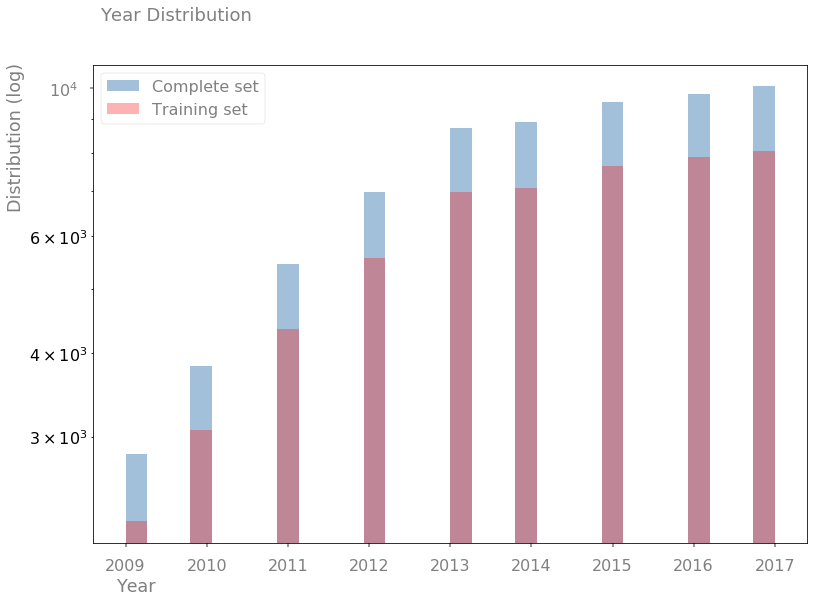

In [180]:
fig = plt.figure()
ax = plt.axes()
plt.yscale('log', nonposy='clip')
ax.hist(years_all, bins=30, alpha=0.5, histtype="stepfilled", color="steelblue", edgecolor="none", label="Complete set")
plt.title("Year Distribution ", color="gray", fontsize=18, x=0.12, y=1.08)
ax.hist(train["Year"], bins=30, alpha=0.3, histtype="stepfilled", color="red", edgecolor="none", label="Training set")

ax.tick_params(axis='y', colors='gray')
ax.set(xlabel="Year", ylabel="Distribution (log)")
ax.tick_params(axis='x', colors='gray')
ax.yaxis.label.set_position((0, 0.85))
ax.xaxis.label.set_position((0.06, 0))
ax.xaxis.label.set_color('gray')
lg1 = ax.legend(loc='upper left')
texts = lg1.get_texts()
texts[0].set_color("gray")
texts[1].set_color("gray")
ax.yaxis.label.set_color('gray')



In [181]:
fig.savefig("year-distribution.png")

In [200]:
from sklearn.metrics import mean_squared_error
def plot_ml_results(x, y, y_pred, title):
    rfr_mse = mean_squared_error(y, y_pred)
    rfr_rmse = np.sqrt(rfr_mse)
    fig = plt.figure()
    ax = plt.axes()
    plt.title("Target vs Prediction", color="gray", fontsize=18, x=0.42, y=1.08)
    plt.suptitle(title + " - RMSE {:.2f}".format(rfr_rmse), color="gray", fontsize=16, x=0.49, y=0.94)
    ax.semilogy(x, y,"-", alpha=1, color='red', linewidth=0.6, label="target")
    ax.semilogy(x, y_pred, "o", color='blue', markersize=0.9, alpha=0.4, label="prediction")

    ax.set(xlabel="Samples (Sorted)", ylabel="# Attempts (log)")
    ax.tick_params(axis='x', colors='gray')
    ax.tick_params(axis='y', colors='gray')
    ax.yaxis.label.set_color('gray')
    ax.yaxis.label.set_position((0, 0.85))
    ax.xaxis.label.set_position((0.12, 0))
    ax.xaxis.label.set_color('gray')
    lg1 = ax.legend()
    texts = lg1.get_texts()
    texts[0].set_color("gray")
    texts[1].set_color("gray")
    plt.tick_params(
        axis='x',          # changes apply to the x-axi
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off

In [150]:
#linear regressor performance
lr_res = pd.read_csv("linear_regression_predictions.csv")

In [151]:
lr_res = lr_res.sort_values(by=["y"])
lr_res = lr_res.reset_index()

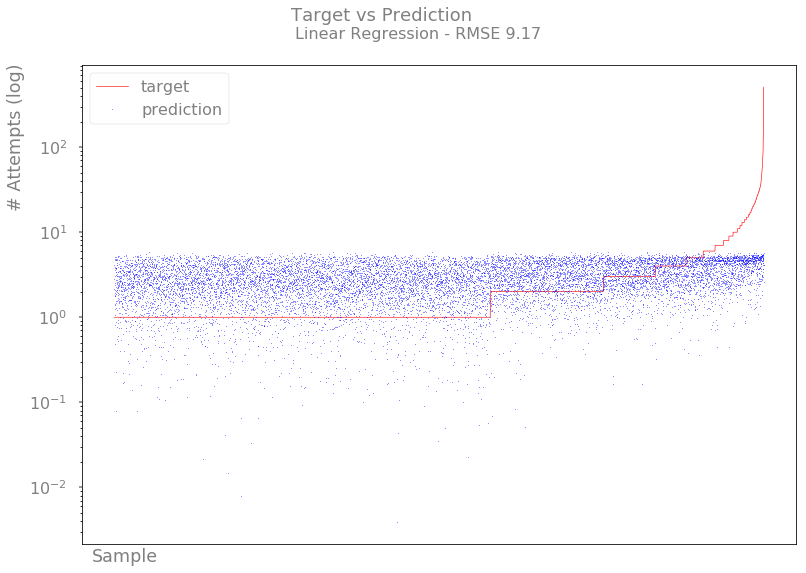

In [153]:
plot_ml_results(lr_res.index.values, lr_res["y"].values, lr_res["y_pred"].values, "Linear Regression")

In [129]:
fig.savefig("lr_target_vs_predictions.png")

In [204]:
#random forest performance
lr_res = pd.read_csv("randomforest_regression_predictions.csv")

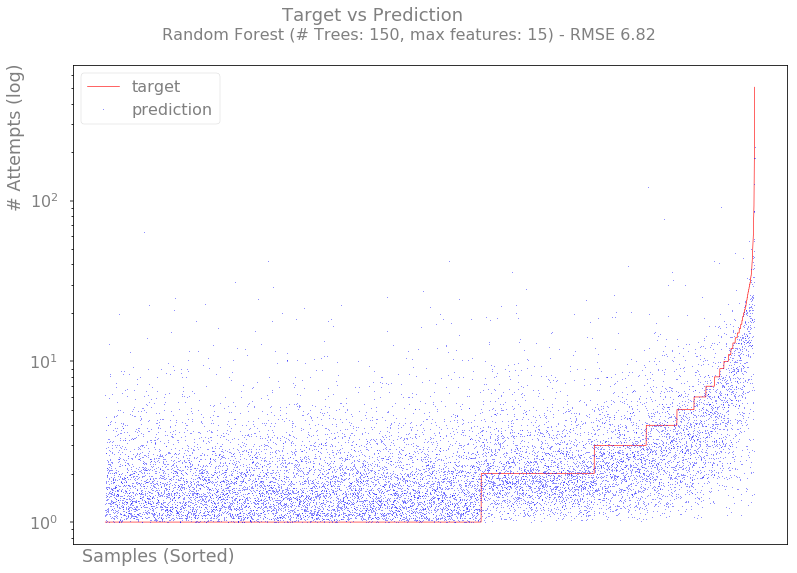

In [208]:
lr_res = lr_res.sort_values(by=["y"])
lr_res = lr_res.reset_index()
plot_ml_results(lr_res.index.values, lr_res["y"].values, lr_res["y_pred"].values, "Random Forest (# Trees: 150, max features: 15)")

In [209]:
fig.savefig("rndforest_target_vs_predictions.png")

In [145]:
test["attempts"].quantile(.9)

5.0